2024-01-08 23:56:00.430840: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 23:56:00.460238: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 23:56:00.460263: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 23:56:00.460920: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 23:56:00.465320: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-08 23:56:00.465988: I tensorflow/core/platform/cpu_feature_guard.cc:1

1/1 [==============================] - 0s 38ms/step


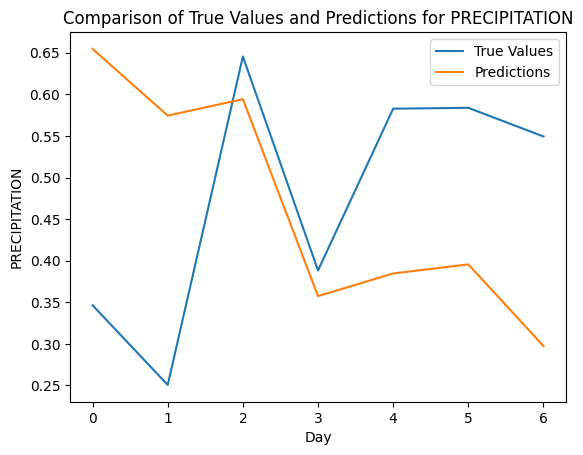

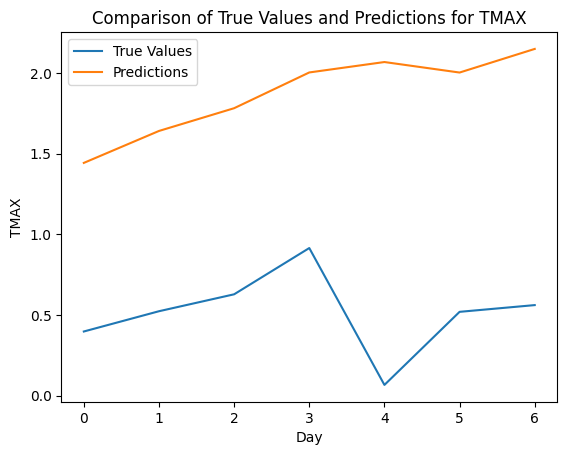

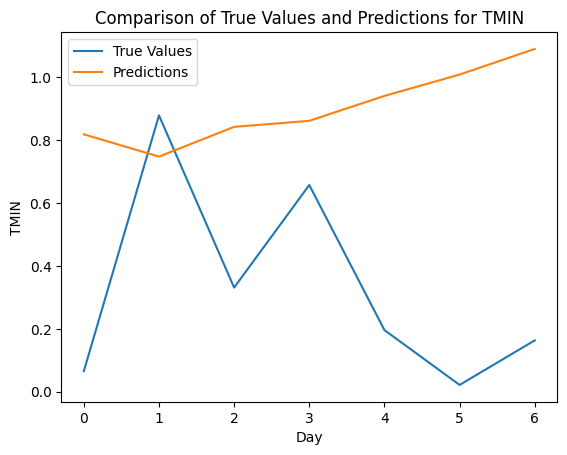

In [1]:
import numpy as np
from tensorflow.keras.models import load_model

model = load_model('2Layers_Linear-saved.h5')

# Generate random dummy data
mock_data = np.random.random((30, 3))  # 30 days, 3 features
mock_data = mock_data.reshape(1, *mock_data.shape)  # Reshape to fit model input --> (1, 30, 3)

predicted_weather = model.predict(mock_data)

# Reshape the predictions to format (7 days, 3 features)
predicted_weather = predicted_weather.reshape(7, 3)

# Generate mock true values for comparison
true_weather = np.random.random((7, 3))  # 7 days, 3 features

# Plotting
import matplotlib.pyplot as plt

# Plot for each feature
features = ['PRECIPITATION', 'TMAX', 'TMIN']
for i, feature in enumerate(features):
    plt.figure()
    plt.plot(true_weather[:, i], label='True Values')
    plt.plot(predicted_weather[:, i], label='Predictions')
    plt.title(f'Comparison of True Values and Predictions for {feature}')
    plt.xlabel('Day')
    plt.ylabel(feature)
    plt.legend()
    plt.show()
